# Studienarbeit: Machine Learning
#### Saniye Ogul und Johannes Horst

### Imports
- plotly
- matplotlib
- pandas
- numpy
- scikit-learn

In [112]:
# Importe
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt

### Aufgabe 1 (Klassifikation des Systemzustands)
Erstellung eines binären Klassifikationsmodell zur Vorhersage des aktuellen Zutands der APU (Air Production Unit) auf Basis der Sensordaten. Soll differenziert werden ob APU in Ordnung oder nicht ist (binäre Klassifikation)
zu verwendene Verfahren:
- einen nicht-parametrisierten Modellansatz,
- einen parametrisierten Modellansatz,
- ein Verfahren aus dem Bereich des Ensemble Learning.

Trainigsdatensatz erstellen z.B. durch geeignete Datentransformationen, Feature Engineering und ggf. Feature Extraction. Sequentielle Struktur der Daten soll berücksichtigt werden.
Wenden Sie zur Modellerstellung (in dieser und den folgenden Aufgaben) geeignete Maßnahmen und Techniken an, damit die resultierenden Modelle eine moglichst hohe Gute aufweisen und beurteilen Sie diese anhand geeigneter Kriterien. Modularisieren und automatisieren Sie Ihren Workflow, damit die einzelnen Schritte in den folgenden Aufgaben ggf.
wiederverwendet werden konnen. Achten Sie darauf, dass Ihre Modelle auf unbekannte Daten angewendet werden konnen, die ggf. fehlende Werte enthalten, auch wenn der gegebene Datensatz keine fehlenden Werte enthalt. Welche Features erweisen sich als besonders aussagekräftig für die gegebene Aufgabenstellung?

- **TP2** - Druck am Kompressor (bar).
- **TP3** - An der Pneumatikzentrale erzeugter Druck (bar).
- **H1** - Ventil, das aktiviert wird, wenn der vom Druckschalter der Steuerung abgelesene Druck über dem Betriebsdruck von 10,2 bar (bar) liegt.
- **DV_pressure** - Druck, der durch den Druckabfall entsteht, wenn die Lufttrockentürme das Wasser. Wenn er gleich Null ist, arbeitet der Kompressor unter Last (bar).
- **Reservoirs** - Druck in den auf den Zügen installierten Luftbehältern (bar).
- **Oil_Temperature** - Temperatur des im Kompressor vorhandenen Öls (°C).
- **Durchflussmesser** - Der Luftdurchfluss wurde an der pneumatischen Schalttafel gemessen (m^3
/h).
- **Motor_Current** - Strom des Motors, der die folgenden Werte aufweisen sollte: (i) nahe 0 A, wenn der (ii) nahe bei 4 A, wenn der Kompressor im Leerlauf arbeitet, und (iii) nahe bei 7 A, wenn der Kompressor der Kompressor unter Last arbeitet (A);
- **COMP** - Elektrisches Signal des Lufteinlassventils des Kompressors. Es ist aktiv, wenn der Kompressor keine Luft ansaugt am Kompressor, d.h. der Kompressor schaltet ab oder arbeitet entlastet.
- **DV_electric** - Elektrisches Signal, das das Auslassventil des Verdichters steuert. Wenn es aktiv ist, bedeutet es, dass der Kompressor unter Last arbeitet, wenn es nicht aktiv ist, bedeutet es, dass der Kompressor ausgeschaltet oder entlastet ist.
- **TOWERS** - Signal, das festlegt, welcher Turm die Luft trocknet und welcher Turm die der Luft entzogene Feuchtigkeit abführt. Wenn es nicht aktiv ist, bedeutet es, dass Turm eins in Betrieb ist, wenn es aktiv ist, bedeutet es, fass Turm zwei in Betrieb ist.
- **MPG** - Ist für die Aktivierung des Einlassventils verantwortlich, um den Kompressor unter Last zu starten, wenn der Druck in der der APU unter 8,2 bar liegt. Folglich aktiviert er den Sensor COMP, der das gleiche Verhalten wie der MPG-Sensor.
- **LPS** - Signal aktiviert, wenn der Druck niedriger als 7 bar ist.
- **Pressure_switch** - Signal, das aktiviert wird, wenn ein Druck am Vorsteuerventil festgestellt wird.
- **Oil_Level** - Der Ölstand am Verdichter ist aktiv (gleich eins), wenn der Ölstand unter den erwarteten
Werten liegt.
- **Caudal_impulses** - Vom Durchflussmesser erzeugtes Signal, das den Luftdurchfluss pro Sekunde.


Was die GPS-Informationen betrifft, so wurde der Zug mit einer sekundären GPS-Antenne ausgestattet, um Folgendes zu erfassen
folgenden Daten:
- **gpsLong** - Längengrad-Position (°).
- **gpsLat** - Position des Breitengrades (°).
- **gpsSpeed** - Geschwindigkeit (km/h).
- **gpsQuality** - Signalqualität.

!!!
Bei der APU handelt es sich um eine Systemkomponente des Zugs, die im laufenden Betrieb ver-
schiedene wichtige Funktionen erf ̈ullt, und deren Ausfall eine sofortige Außerbetriebnahme und
Reparatur erforderlich macht. Weiterhin werden Angaben zu drei St ̈orungsf ̈allen gemacht, die
sich w ̈ahrend des o.g. Betrachtungszeitraums ergeignet haben. Diese k ̈onnen verwendet werden,
um geeignete Zielvariablen f ̈ur Methoden des Supervised Learning abzuleiten

In [113]:
# Daten einlesen
df = pd.read_csv('dataset_train.csv')
df.head()

,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Flowmeter,Motor_current,COMP,...,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses,gpsLong,gpsLat,gpsSpeed,gpsQuality
0,2022-01-01 06:00:00,-0.012,9.758,9.760,-0.028,1.576,63.350,19.049625,3.9550,1,...,1,1,0,0,0,0,-8.65934,41.2124,0,1
1,2022-01-01 06:00:01,-0.012,9.760,9.760,-0.028,1.578,63.250,19.049625,4.0275,1,...,1,1,0,0,0,0,-8.65934,41.2124,0,1
2,2022-01-01 06:00:02,-0.010,9.760,9.760,-0.028,1.578,63.325,19.040281,3.9450,1,...,1,1,0,0,0,0,-8.65934,41.2124,0,1
3,2022-01-01 06:00:03,-0.012,9.756,9.756,-0.030,1.576,63.200,19.040281,3.9300,1,...,1,1,0,0,0,0,-8.65934,41.2124,0,1
4,2022-01-01 06:00:04,-0.012,9.756,9.756,-0.030,1.578,63.150,19.049625,3.9950,1,...,1,1,0,0,0,0,-8.65934,41.2124,0,1


In [114]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

### Failures:
- Failure 1: 28.02.2022 23:00:00 - 01.03.

In [115]:
import datetime as dt
from pandas import DataFrame
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.head()

,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Flowmeter,Motor_current,COMP,...,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses,gpsLong,gpsLat,gpsSpeed,gpsQuality
0,2022-01-01 06:00:00,-0.012,9.758,9.760,-0.028,1.576,63.350,19.049625,3.9550,1,...,1,1,0,0,0,0,-8.65934,41.2124,0,1
1,2022-01-01 06:00:01,-0.012,9.760,9.760,-0.028,1.578,63.250,19.049625,4.0275,1,...,1,1,0,0,0,0,-8.65934,41.2124,0,1
2,2022-01-01 06:00:02,-0.010,9.760,9.760,-0.028,1.578,63.325,19.040281,3.9450,1,...,1,1,0,0,0,0,-8.65934,41.2124,0,1
3,2022-01-01 06:00:03,-0.012,9.756,9.756,-0.030,1.576,63.200,19.040281,3.9300,1,...,1,1,0,0,0,0,-8.65934,41.2124,0,1
4,2022-01-01 06:00:04,-0.012,9.756,9.756,-0.030,1.578,63.150,19.049625,3.9950,1,...,1,1,0,0,0,0,-8.65934,41.2124,0,1


In [116]:
from matplotlib.dates import DateFormatter

# A function that takes two timestamps as input and visulizes the data between them
def plot_df(df, start, end):
    # Create a new dataframe with the data between start and end timestamps
    mask = (df['timestamp'] > start) & (df['timestamp'] <= end)
    df_plot = df.loc[mask]
    # Create a plotly figure
    fig = px.line(df_plot, x='timestamp', y='LPS', title='LPS')
    # Show the figure
    fig.show()

# A function that takes two timestamps as input and visulizes the data between them using matplotlib
def plot_df_matplotlib(df : DataFrame, start, end, column, highlightStart: dt.datetime, highlightEnd: dt.datetime):
    # Create a new dataframe with the data between start and end timestamps
    mask = (df['timestamp'] > start) & (df['timestamp'] <= end)
    df_plot = df.loc[mask]
    # Create a matplotlib figure
    fig, ax = plt.subplots()
    ax.plot(df_plot['timestamp'], df_plot[column])
    ax.set(xlabel='timestamp', ylabel=column, title=column)
    #display 20 x-axis labels
    ax.xaxis.set_major_locator(plt.MaxNLocator(20))
    ax.grid()
    formatter = DateFormatter('%H:%M:%S')
    plt.axvspan(highlightStart, highlightEnd, color='red', alpha=0.5)
    fig1 = plt.gcf()
    fig1.axes[0].xaxis.set_major_formatter(formatter)  # Set the x-axis to display time
    fig1.set_size_inches(18.5, 2.5)
    #fig1.savefig('test2png.png', dpi=100)
    # Show the figure
    plt.show()

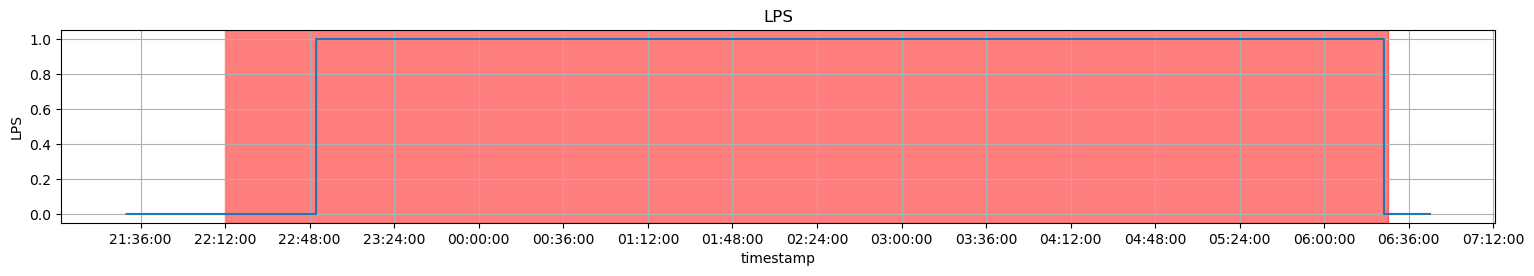

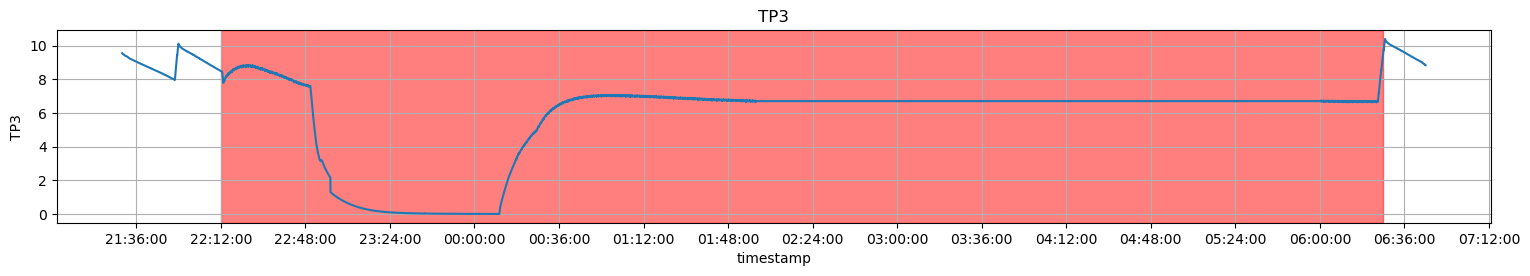

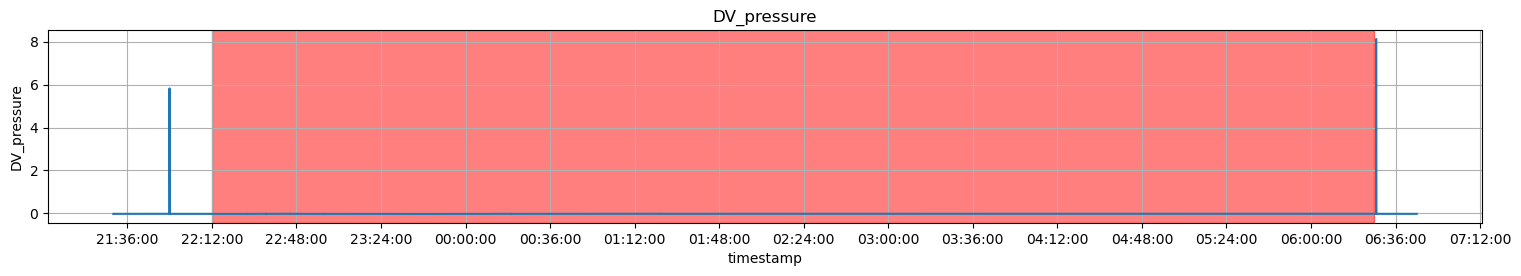

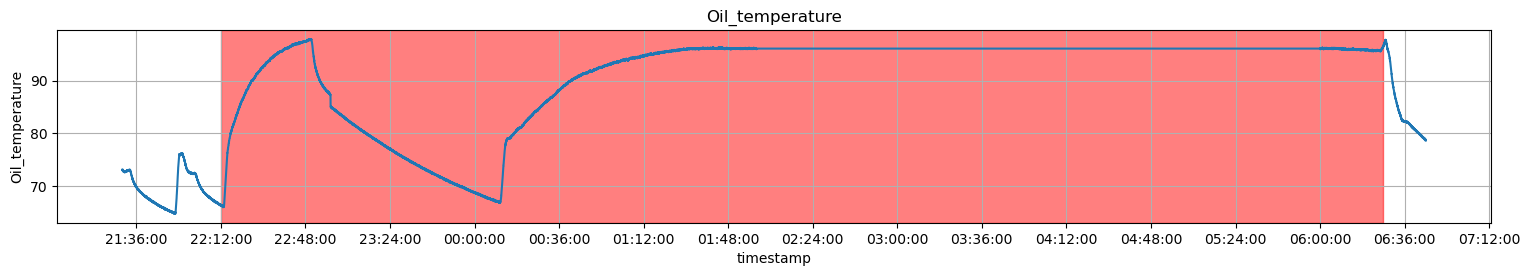

In [117]:
#Fehler 1

start = dt.datetime(2022,2,28,21,30)
end = dt.datetime(2022,3,1,6,45)
err_1_start = dt.datetime(2022,2,28,22,12)
err_1_end = dt.datetime(2022,3,1,6,27)

plot_df_matplotlib(df, start, end, 'LPS', err_1_start, err_1_end)
plot_df_matplotlib(df, start, end, 'TP3', err_1_start, err_1_end)
plot_df_matplotlib(df, start, end, 'DV_pressure', err_1_start, err_1_end)
plot_df_matplotlib(df, start, end, 'Oil_temperature', err_1_start, err_1_end)

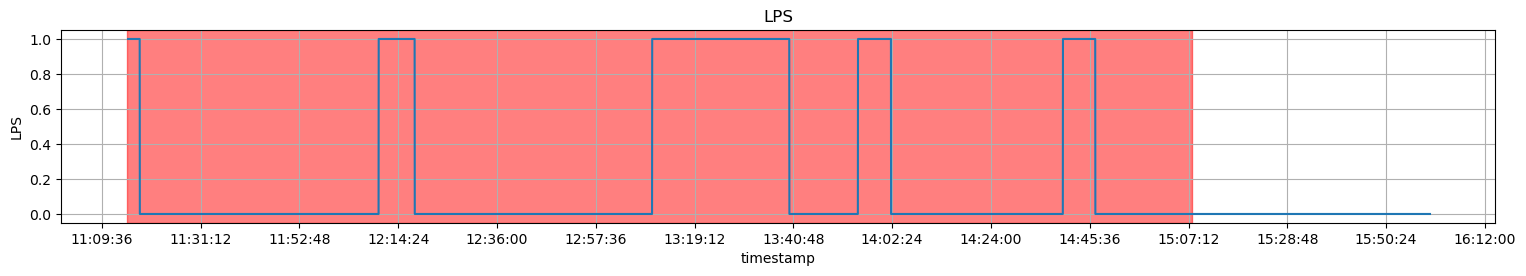

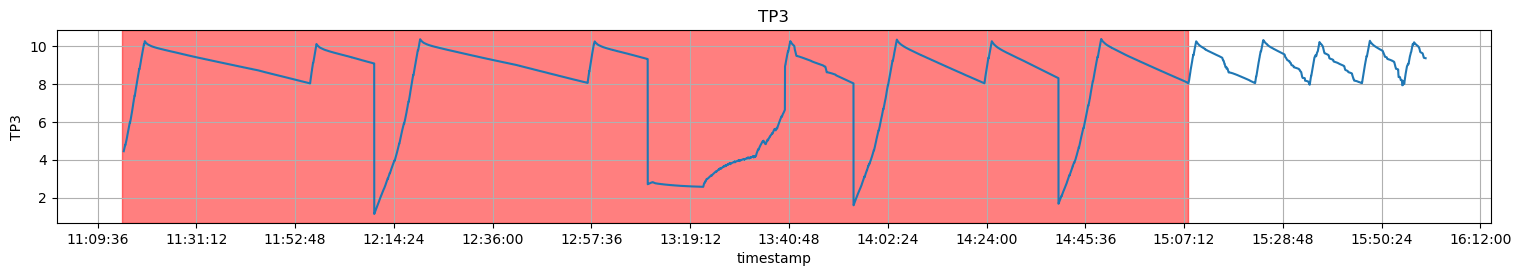

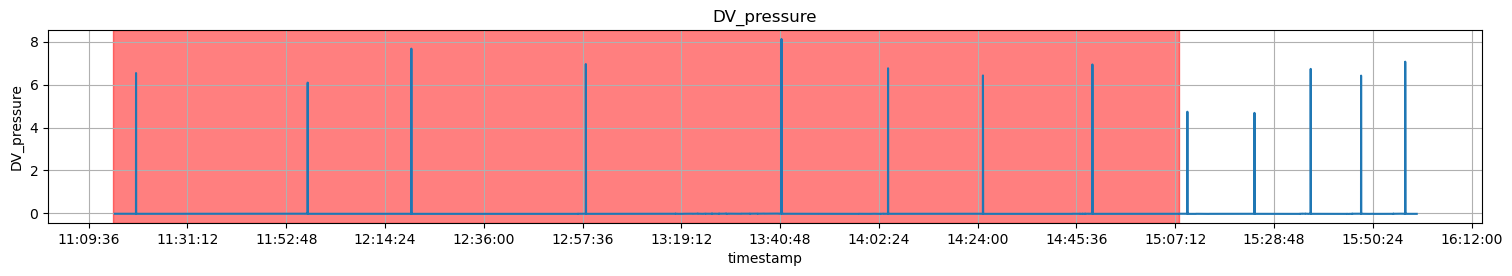

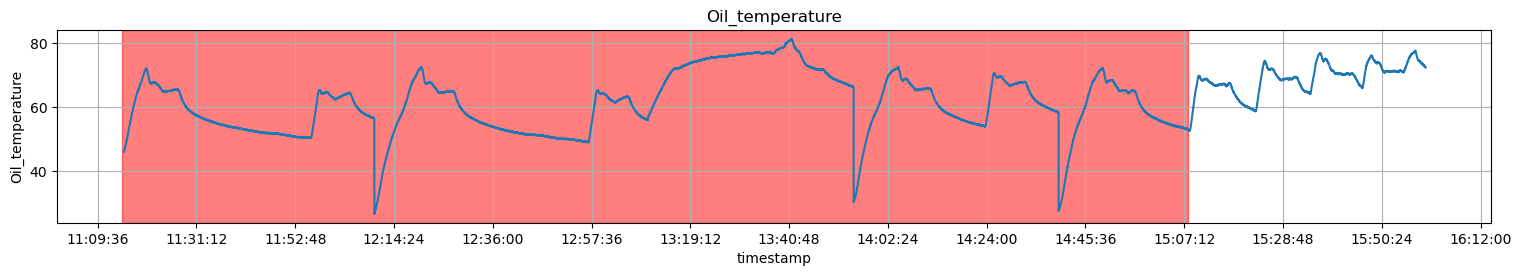

In [118]:
#Fehler 2

start = dt.datetime(2022,3,24,11,00)
end = dt.datetime(2022,3,24,16,00)
err_2_start = dt.datetime(2022,3,24,11,15)
err_2_end = dt.datetime(2022,3,24,15,8)


plot_df_matplotlib(df, start, end, 'LPS', err_2_start, err_2_end)
plot_df_matplotlib(df, start, end, 'TP3', err_2_start, err_2_end)
plot_df_matplotlib(df, start, end, 'DV_pressure', err_2_start, err_2_end)
plot_df_matplotlib(df, start, end, 'Oil_temperature', err_2_start, err_2_end)

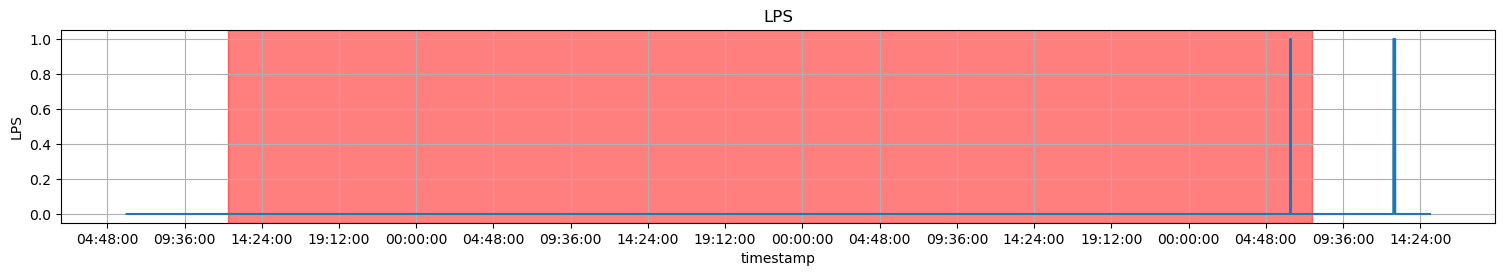

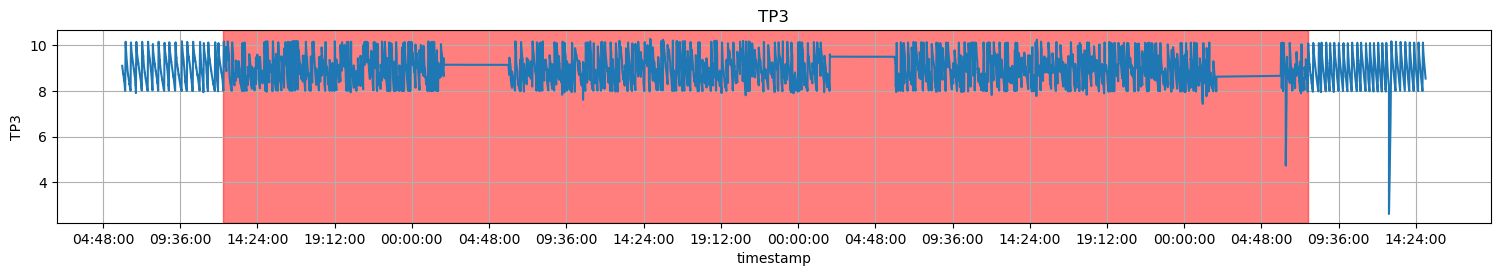

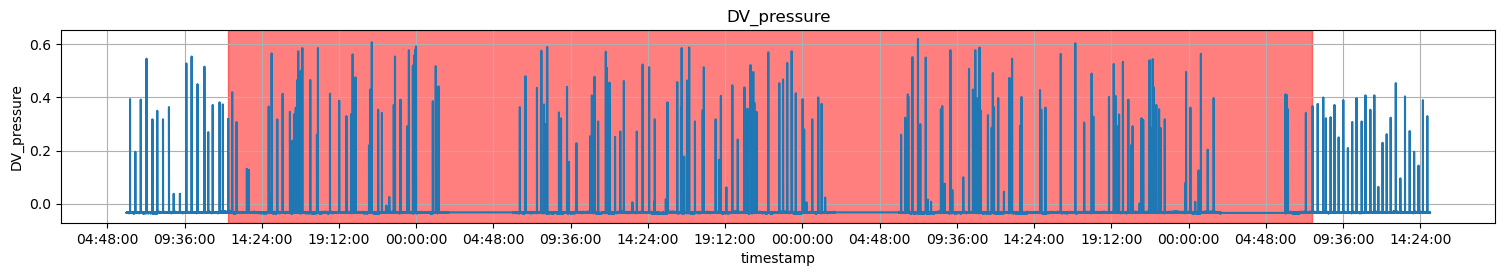

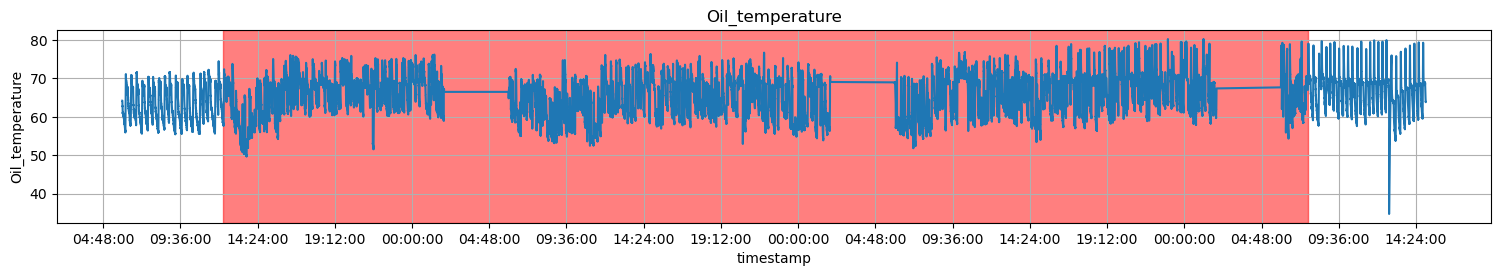

In [119]:
#Fehler 3

start = dt.datetime(2022,5,30,4,00)
end = dt.datetime(2022,6,2,15,00)
err_3_start = dt.datetime(2022,5,30,12,17)
err_3_end = dt.datetime(2022,6,2,7,40)


plot_df_matplotlib(df, start, end, 'LPS', err_3_start, err_3_end)
plot_df_matplotlib(df, start, end, 'TP3', err_3_start, err_3_end)
plot_df_matplotlib(df, start, end, 'DV_pressure', err_3_start, err_3_end)
plot_df_matplotlib(df, start, end, 'Oil_temperature', err_3_start, err_3_end)


### Zeiterfassung der Störungsfälle (für eigene Labels)
**Fall 1:**
- 28.2-1.03: 22:12:00 - 6:27:00

**Fall 2:**
- 24.03: 11:15:00 - 15:08:00

**Fall 3:**
- 30.05-02.06: 04:00:00 - 07:40:00 



In [120]:
#Aus Tabelle
err_1_start = dt.datetime(2022,2,28,21,53)
err_1_end = dt.datetime(2022,3,1,2,00)
err_2_start = dt.datetime(2022,3,23,14,54)
err_2_end = dt.datetime(2022,3,23,15,24)
err_3_start = dt.datetime(2022,5,30,12,00)
err_3_end = dt.datetime(2022,6,2,6,18)


In [121]:
#Add another column to the dataframe that is called Label is 1 on all rows where the timestamp is between err_1_start and err_1_end or err_2_start and err_2_end or err_3_start and err_3_end and 0 otherwise
df['Label'] = np.where(
    ((df['timestamp'] >= err_1_start) & (df['timestamp'] <= err_1_end)) |
    ((df['timestamp'] >= err_2_start) & (df['timestamp'] <= err_2_end)) | 
    ((df['timestamp'] >= err_3_start) & (df['timestamp'] <= err_3_end)), 1, 0)
df.head()

,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Flowmeter,Motor_current,COMP,...,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses,gpsLong,gpsLat,gpsSpeed,gpsQuality,Label
0,2022-01-01 06:00:00,-0.012,9.758,9.760,-0.028,1.576,63.350,19.049625,3.9550,1,...,1,0,0,0,0,-8.65934,41.2124,0,1,0
1,2022-01-01 06:00:01,-0.012,9.760,9.760,-0.028,1.578,63.250,19.049625,4.0275,1,...,1,0,0,0,0,-8.65934,41.2124,0,1,0
2,2022-01-01 06:00:02,-0.010,9.760,9.760,-0.028,1.578,63.325,19.040281,3.9450,1,...,1,0,0,0,0,-8.65934,41.2124,0,1,0
3,2022-01-01 06:00:03,-0.012,9.756,9.756,-0.030,1.576,63.200,19.040281,3.9300,1,...,1,0,0,0,0,-8.65934,41.2124,0,1,0
4,2022-01-01 06:00:04,-0.012,9.756,9.756,-0.030,1.578,63.150,19.049625,3.9950,1,...,1,0,0,0,0,-8.65934,41.2124,0,1,0


In [122]:
# Bestimmen Sie die Größe des Fensters
window_size = 10
columns = df.columns
#only keep columns: TP2, TP3, LPS, DV_pressure, Oil_temperature, Label
columns = ['TP3', 'LPS', 'DV_pressure', 'Oil_temperature', 'Label']
operations = ['mean', 'std', 'min', 'max']

#generate a dict, where the keys are the column names and the values are the operations that should be performed on the column
operations_dict = {}
for column in columns:
    operations_dict[column] = operations
    #keep the labels
    operations_dict['Label'] = ['max']

df_rolling = df.rolling(window_size).agg(operations_dict)

#drop all columns that have NaN values
df_rolling = df_rolling.dropna()
df_rolling


#Rolling window on the datafame df with the window size window_size, calcualtes maean, standard deviation, minValue, maxValue, difference between min and max as span and average for each column
#df_rolling = df.rolling(window_size).agg({'LPS': ['mean', 'std', 'min', 'max', 'mean'], 'TP3': ['mean', 'std', 'min', 'max', 'mean'], 'DV_pressure': ['mean', 'std', 'min', 'max', 'mean'], 'Oil_temperature': ['mean', 'std', 'min', 'max', 'mean']})

TP3                         Label  LPS                 \
            mean       std    min    max   max mean  std  min  max   
9         9.7552  0.003425  9.750  9.760   0.0  0.0  0.0  0.0  0.0   
10        9.7544  0.003627  9.750  9.760   0.0  0.0  0.0  0.0  0.0   
11        9.7534  0.003273  9.750  9.760   0.0  0.0  0.0  0.0  0.0   
12        9.7522  0.002741  9.748  9.756   0.0  0.0  0.0  0.0  0.0   
13        9.7514  0.002675  9.748  9.756   0.0  0.0  0.0  0.0  0.0   
...          ...       ...    ...    ...   ...  ...  ...  ...  ...   
10773583  8.4526  0.006328  8.444  8.462   0.0  0.0  0.0  0.0  0.0   
10773584  8.4506  0.006186  8.442  8.460   0.0  0.0  0.0  0.0  0.0   
10773585  8.4484  0.006381  8.438  8.458   0.0  0.0  0.0  0.0  0.0   
10773586  8.4464  0.006168  8.438  8.456   0.0  0.0  0.0  0.0  0.0   
10773587  8.4446  0.005661  8.438  8.454   0.0  0.0  0.0  0.0  0.0   

         DV_pressure                         Oil_temperature            \
                mean       std    min    max            mean       std   
9            -0.0286  0.000966 -0.030 -0.028         63.1500  0.126930   
10           -0.0286  0.000966 -0.030 -0.028         63.1075  0.123631   
11           -0.0286  0.000966 -0.030 -0.028         63.0700  0.132183   
12           -0.0286  0.000966 -0.030 -0.028         63.0150  0.128668   
13           -0.0286  0.000966 -0.030 -0.028         62.9700  0.135298   
...              ...       ...    ...    ...             ...       ...   
10773583     -0.0322  0.000632 -0.034 -0.032         63.3150  0.068920   
10773584     -0.0324  0.000843 -0.034 -0.032         63.2925  0.065670   
10773585     -0.0324  0.000843 -0.034 -0.032         63.2825  0.067752   
10773586     -0.0324  0.000843 -0.034 -0.032         63.2625  0.066927   
10773587     -0.0324  0.000843 -0.034 -0.032         63.2525  0.068160   

                          
             min     max  
9         63.000  63.350  
10        62.925  63.325  
11        62.875  63.325  
12        62.775  63.200  
13        62.750  63.150  
...          ...     ...  
10773583  63.200  63.425  
10773584  63.200  63.375  
10773585  63.200  63.375  
10773586  63.175  63.375  
10773587  63.175  63.375  

[10773579 rows x 17 columns]

In [123]:
#flatten df_rolling
df_rolling.columns = ['_'.join(col) for col in df_rolling.columns]
#rename Label_min to Label
df_rolling = df_rolling.rename(columns={'Label_max': 'Label'})
df_rolling.head()

,TP3_mean,TP3_std,TP3_min,TP3_max,Label,LPS_mean,LPS_std,LPS_min,LPS_max,DV_pressure_mean,DV_pressure_std,DV_pressure_min,DV_pressure_max,Oil_temperature_mean,Oil_temperature_std,Oil_temperature_min,Oil_temperature_max
9,9.7552,0.003425,9.750,9.760,0.0,0.0,0.0,0.0,0.0,-0.0286,0.000966,-0.03,-0.028,63.1500,0.126930,63.000,63.350
10,9.7544,0.003627,9.750,9.760,0.0,0.0,0.0,0.0,0.0,-0.0286,0.000966,-0.03,-0.028,63.1075,0.123631,62.925,63.325
11,9.7534,0.003273,9.750,9.760,0.0,0.0,0.0,0.0,0.0,-0.0286,0.000966,-0.03,-0.028,63.0700,0.132183,62.875,63.325
12,9.7522,0.002741,9.748,9.756,0.0,0.0,0.0,0.0,0.0,-0.0286,0.000966,-0.03,-0.028,63.0150,0.128668,62.775,63.200
13,9.7514,0.002675,9.748,9.756,0.0,0.0,0.0,0.0,0.0,-0.0286,0.000966,-0.03,-0.028,62.9700,0.135298,62.750,63.150


In [124]:
train, test = train_test_split(df_rolling, test_size=0.1, random_state=42)

y_train = train["Label"]
y_test = test["Label"]

X_train = train.drop(["Label"],axis=1)
X_test = test.drop(["Label"],axis=1)

X_test.columns


Index(['TP3_mean', 'TP3_std', 'TP3_min', 'TP3_max', 'LPS_mean', 'LPS_std',
       'LPS_min', 'LPS_max', 'DV_pressure_mean', 'DV_pressure_std',
       'DV_pressure_min', 'DV_pressure_max', 'Oil_temperature_mean',
       'Oil_temperature_std', 'Oil_temperature_min', 'Oil_temperature_max'],
      dtype='object')

In [125]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth = 4, min_samples_leaf = 5)
clf = clf.fit(X_train, y_train)


In [126]:
# Vorhersage mit KNN-Modell
accuracy = clf.score(X_test, y_test)
print("Die Genauigkeit des Modells beträgt: ", accuracy)

Die Genauigkeit des Modells beträgt:  0.9818426187024183


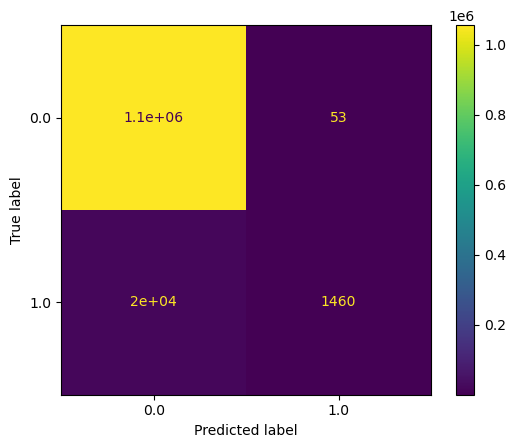

In [127]:
y_pred = clf.predict(X_test)
y_true = y_test

#Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()


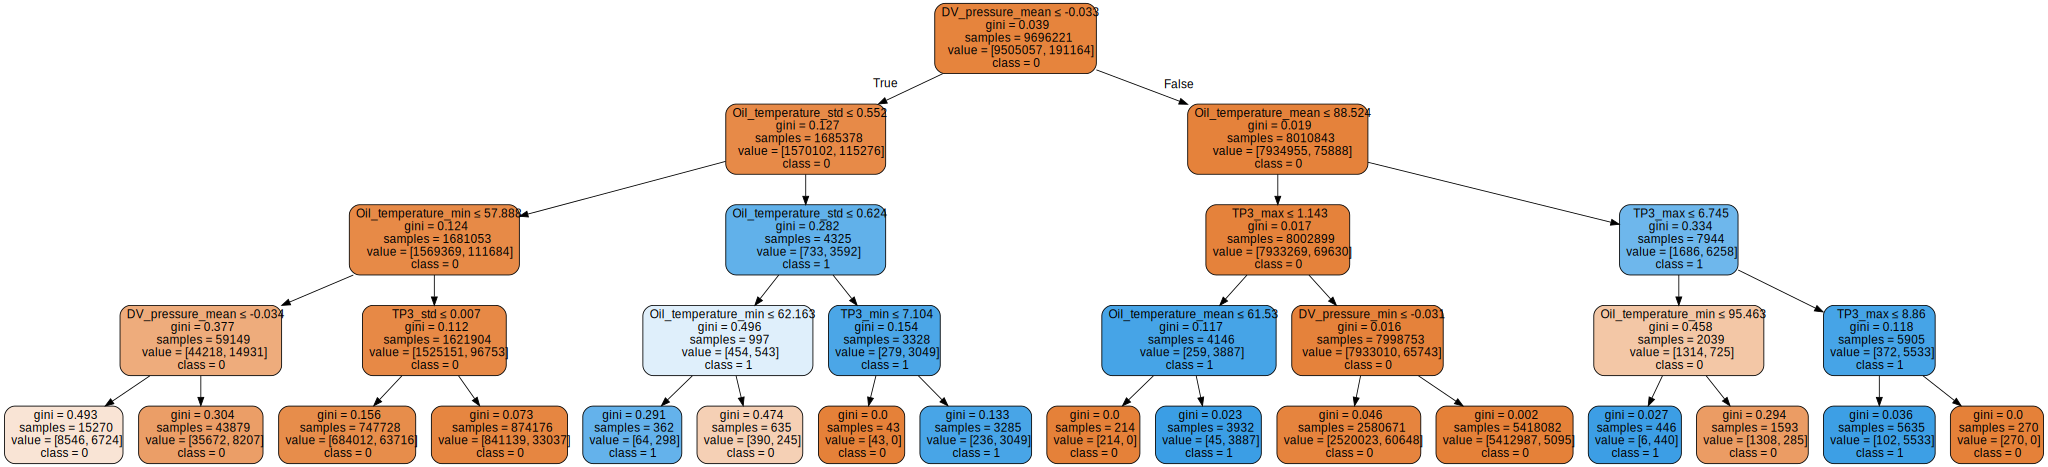

In [128]:
import graphviz
from sklearn import tree
dot_data = tree.export_graphviz(clf, out_file=None) 
 
dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names=X_train.columns,  
                      class_names=['0','1'],  
                      filled=True, rounded=True,  
                      special_characters=True) 

graph = graphviz.Source(dot_data)
graph

In [134]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns


#Klassifizierung mit Decision Tree
class DecisionTreeBinaryClassifier:
    def __init__(self, test_size=0.1, random_state=42, max_depth=7, min_samples_leaf=10, columns=[]):
        #set parameters
        self.test_size = test_size
        self.random_state = random_state
        self.max_depth = max_depth
        self.min_samples_leaf = min_samples_leaf
        self.columns = columns
        self.model = DecisionTreeClassifier(max_depth = self.max_depth, min_samples_leaf = self.min_samples_leaf)

    def fit(self, df, label):
        #split data into train and test
        train_n, test_n = train_test_split(df, test_size=self.test_size, random_state=self.random_state)
        #split train and test into X and y
        y_train = train_n[label]
        y_test  = test_n[label]
        #drop label from X
        X_train = train_n.drop([label],axis=1)
        X_test = test_n.drop([label],axis=1)
        #keep only columns that are in self.columns
        X_train = X_train[self.columns]
        X_test = X_test[self.columns]
        #save X and y for later use
        self.X_test, self.X_train = X_test, X_train
        self.y_test, self.y_train = y_test, y_train
        #fit model
        self.model.fit(X_train, y_train)

    def score(self):
        #return accuracy score
        return self.model.score(self.X_test, self.y_test)

    def predict(self):
        #return prediction
        return self.model.predict(self.X_test)


    def confusion_matrix(self):
        y_pred = self.predict()
        y_true = self.y_test
        cm = confusion_matrix(y_true, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=self.model.classes_)
        return disp.plot()

    def corellation_matrix(self):
        corr = self.X_train.corr()
        return sns.heatmap(corr,
                xticklabels=corr.columns,
                yticklabels=corr.columns)
    
    def decision_tree_graph(self):
        dot_data = tree.export_graphviz(self.model, out_file=None) 
        dot_data = tree.export_graphviz(self.model, out_file=None, 
                            feature_names=self.X_train.columns,  
                            class_names=['0','1'],  
                            filled=True, rounded=True,  
                            special_characters=True) 
        graph = graphviz.Source(dot_data)
        return graph



In [139]:
#Ohne Windowingrolling

#column of the label
label = 'Label'
#only keep columns: TP3, LPS, DV_pressure, Oil_temperature
columns = ['TP3', 'LPS', 'DV_pressure', 'Oil_temperature']
clf = DecisionTreeBinaryClassifier(max_depth=7, min_samples_leaf=5, columns=columns)
clf.fit(df=df, label=label)
print("Accuracy:", clf.score())

Accuracy: 0.9815613922564345


In [140]:
#find best parameters for max_depth and min_samples_leaf on a range from 3 to 30 for best accuracy
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import make_scorer, accuracy_score

#set parameters
label = 'Label'
columns = ['TP3', 'LPS', 'DV_pressure', 'Oil_temperature']
#set range for max_depth and min_samples_leaf
max_depth = list(range(3,30))
min_samples_leaf = list(range(3,30))
#set parameters for GridSearchCV
parameters = {'max_depth':max_depth, 'min_samples_leaf':min_samples_leaf}
scorer = make_scorer(accuracy_score)
cv_sets = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
#fit model
clf = DecisionTreeClassifier()
grid_obj = GridSearchCV(clf, parameters, scoring=scorer, cv=cv_sets)
grid_fit = grid_obj.fit(X_train, y_train)
#save best parameters
best_clf = grid_fit.best_estimator_
best_max_depth = best_clf.max_depth
best_min_samples_leaf = best_clf.min_samples_leaf
print("Best max_depth:", best_max_depth)
print("Best min_samples_leaf:", best_min_samples_leaf)

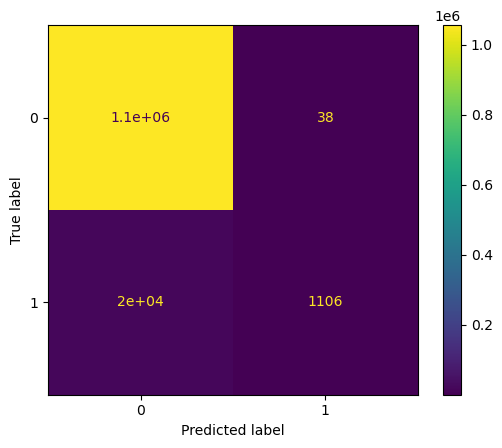

In [138]:
clf.confusion_matrix()

<AxesSubplot: >

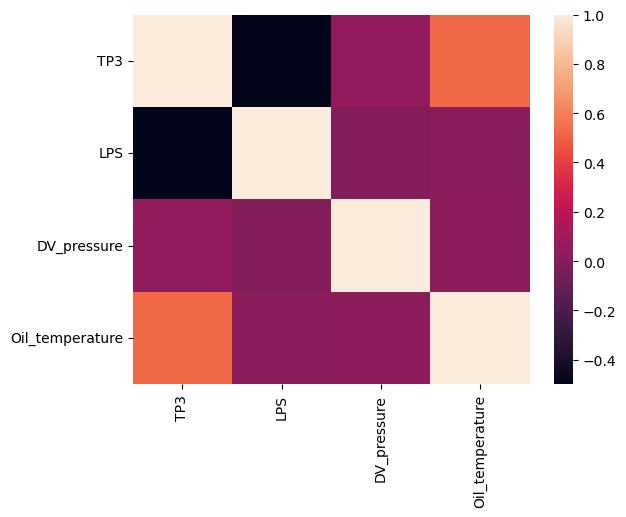

In [132]:
clf.corellation_matrix()

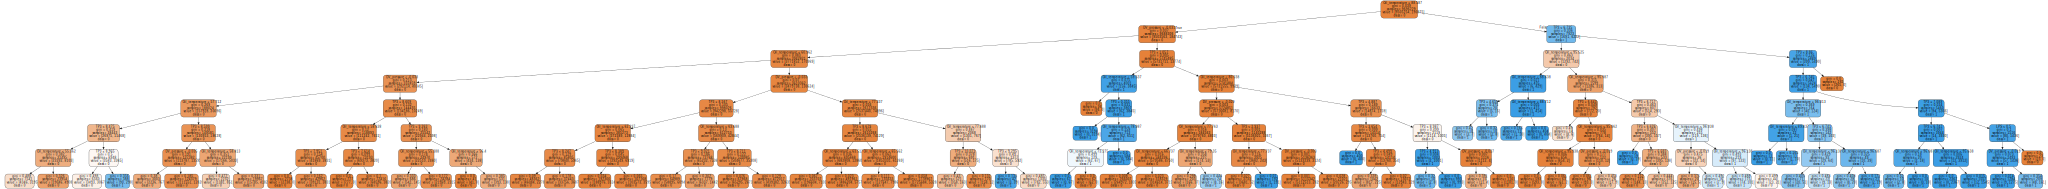

In [133]:
clf.decision_tree_graph()

### Aufgabe 2 (Vorhersage des Eintretens von Störungen)
Erstellen Sie nun Klassifikationsmodelle, um anhand der gegebenen Sensormessdaten vorherzusagen, ob innerhalb eines bestimmten Zeitraums (z.B. 1 Stunde, 2 Stunden etc.) eine Storung der APU auftreten wird. Laut Betreiber ware es wünschenswert, mindestens zwei Stunden im Voraus eine Storung vorhersagen zu können, um rechtzeitig Maßnahmen einzuleiten, vgl. [1]. Testen Sie verschiedene Prognosezeitraume und stellen Sie die resultierenden Modelle gegen über.

### Aufgabe 3 (Vorhersage der Dauer von Störungen)
Entwickeln Sie Prognosemodelle zur Vorhersage der Storungsdauer und beurteilen Sie auf geeignete Weise deren Gute sowie deren Eignung für den Einsatz in der Praxis. Sofern diese aus Ihrer Sicht nicht ausreichend ist, skizzieren Sie Maßnahmen, durch die die Gute verbessert werden konnte.

### Aufgabe 4 (Vorhersage der gestorten Komponente) 
Untersuchen Sie, ob sich der Datensatz auch dazu eignet, die von einer Storung betroffenen Komponente anhand der Sensordaten zu identifizieren. Erstellen und evaluieren Sie dazu entsprechende Modelle.

### Aufgabe 5 (Störungserkennung mit Hilfe von Unsupervised Learning)
Eine Herausforderung bei der Modellbildung fur Predictive Maintenance ist häufig das Fehlen von Informationen zu historischen Storungen, sodass Ansätze des Supervised Learning nicht anwendbar sind. In diesem Fall konnen Methoden des Unsupervised Learning eine Option sein. Wenden Sie auf den Datensatz aus Aufgabe 1 (ohne Labels) ein Clustering-Verfahren an und
uberprüfen Sie anhand der gegebenen Informationen zu den historischen Systemausfällen, ob und wie gut sich durch einen solchen Ansatz Ausnahmezustande (Anomalien bzw. Störungen) von "normalen" Systemzustanden der APU unterscheiden lassen.